# KMeans Clustering

## Prerequisites


In [179]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option("display.width", 1000)
pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:.2f}".format

In [180]:
master_df_scaled = pd.read_pickle("../data/processed/master_df_scaled.pkl")

In [181]:
selected_features = [
    "naics1_occ1",
    "naics1_occ2",
    "naics1_occ3",
    "naics1_occ4",
    "naics1_occ5",
    "naics2-5_occ1-3",
    "naics2-5_occ4-5",
    "naics1_est",
    "naics2-5_est",
    "naics1_ap",
    "naics2-5_ap",
    "newest_gdp",
]
result_df = master_df_scaled[selected_features]

## Clustering


### Identifying n-clusters


#### Methods


In [182]:
# Elbow Method
def optimise_kmeans(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, init="k-means++", max_iter=300, n_init=10)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Plot
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, "o-")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

In [183]:
def silhouetteScore(df, max_it):
    for i in range(2, max_it):
        kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10)

        clusters = kmeans.fit_predict(df)
        print(
            f"The score for {i} Cluster for KMeans is {silhouette_score(df, clusters)}"
        )

#### Visualise


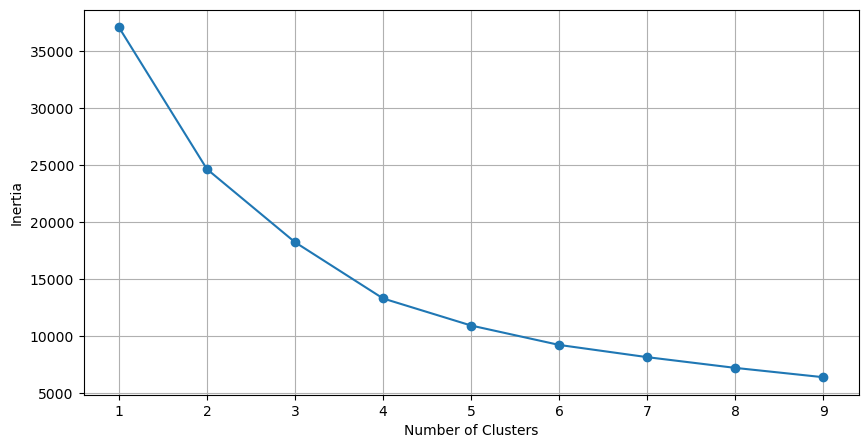

In [184]:
optimise_kmeans(result_df, 10)

In [185]:
silhouetteScore(result_df, 10)

The score for 2 Cluster for KMeans is 0.9231905405203602
The score for 3 Cluster for KMeans is 0.8937354993901002
The score for 4 Cluster for KMeans is 0.8577292075928431
The score for 5 Cluster for KMeans is 0.836925894622787
The score for 6 Cluster for KMeans is 0.8432186993314981
The score for 7 Cluster for KMeans is 0.8052504659691784
The score for 8 Cluster for KMeans is 0.8039909566149457
The score for 9 Cluster for KMeans is 0.744637286857403


In [186]:
number_of_clusters = 4

#### Applying KMeans to our data


In [187]:
kmeans = KMeans(
    n_clusters=number_of_clusters, init="k-means++", max_iter=300, n_init=10
)
kmeans.fit(result_df)

result_df["Cluster_ID"] = kmeans.labels_

### Analyse Clusters


In [188]:
print(result_df["Cluster_ID"].value_counts())

Cluster_ID
0    2940
1     131
2      16
3       2
Name: count, dtype: int64


In [189]:
cluster_counts = result_df["Cluster_ID"].value_counts().sort_values(ascending=False)

ordered_labels = {
    old_label: new_label for new_label, old_label in enumerate(cluster_counts.index)
}

result_df["Cluster_ID"] = result_df["Cluster_ID"].map(ordered_labels)

In [190]:
print(result_df["Cluster_ID"].value_counts())

Cluster_ID
0    2940
1     131
2      16
3       2
Name: count, dtype: int64


<Axes: xlabel='Cluster_ID'>

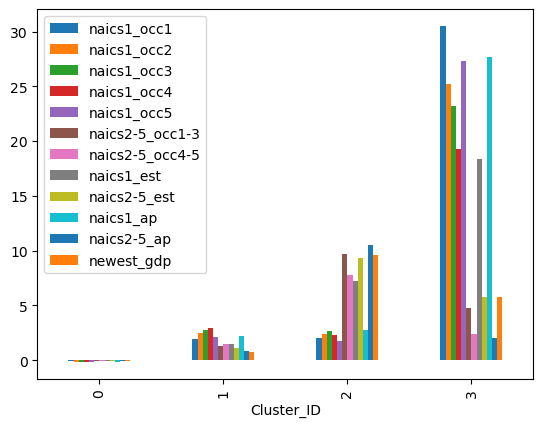

In [191]:
result_df.groupby("Cluster_ID")[selected_features].mean().plot(legend=True, kind="bar")

In [192]:
print(result_df[result_df["Cluster_ID"] == 2].head(5))
print(result_df[result_df["Cluster_ID"] == 3].head(5))

      naics1_occ1  naics1_occ2  naics1_occ3  naics1_occ4  naics1_occ5  naics2-5_occ1-3  naics2-5_occ4-5  naics1_est  naics2-5_est  naics1_ap  naics2-5_ap  newest_gdp  Cluster_ID
FIPS                                                                                                                                                                             
4013         0.81         1.85         2.17         1.01         1.90            10.04             7.77        8.14         11.19       1.90         8.24        9.28           2
6001        -0.05         0.04         0.07        -0.10        -0.07             5.58             1.58        2.30          6.65       0.09         9.94        8.37           2
6037         1.55         3.43         4.37         1.22         1.19            19.33             7.07       24.32         28.00       5.41        25.31       18.96           2
6059         0.71         1.65         2.13         0.52         0.53             9.99             2.67       

### Export


In [193]:
pd.to_pickle(result_df, "../data/processed/result_kmeans_df.pkl")